# CLEANING DATA

This notebook is used to have a first look at the data, and clean it (nulls, duplicates, inconsistencias, etc).

In [22]:
DATA DESCRIPTION... PENDING

SyntaxError: invalid syntax (<ipython-input-22-6f25f13c0289>, line 1)

First, we import all the libraries that will be used:

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Opening file

In [14]:
# Listing the names of the files as provided by the client.
!ls ../../data/01_raw/

b1.txt  b2.odt  b2.txt  bd2.pdf


In [20]:
# Data location
base_path = "../../data/01_raw/"

file1 = "b1.txt" # Contains data from 'begining of times' to 201X
file2 = "b2.txt" # Contains data from 201X to the extraction date on October 2019.

# Files dont contain the headers
header_file1 = ["Product_id",
          "Desc",
          "Date",
          "Section",
          "BmUP",
          "VeUp",
          "CzUP",
          "AaUP",
          "SeUP",
          "JPUP",
          "RzUP",
          "AeUP",
          "LiUP",
          "EnUP",
          "GoUP",
          "GrUP",
          "AnUP",
          "MoUP",
          "PoUP",
          "MsUP",
          "ViUP"]

header_file2 = ["Product_id",
          "Desc",
          "Date",
          "Section",
          "BmUP",
          "VeUp",
          "CzUP",
          "AaUP",
          "SeUP",
          "JPUP",
          "RzUP",
          "AeUP",
          "LiUP",
          "EnUP",
          "GoUP",
          "GrUP",
          "AnUP",
          "MoUP",
          "PoUP",
          "MsUP",
          "ViUP",
          "ZiUO",
          "GeUP"]

In [21]:
#Reading the file with the right encoding
df_file1 = pd.read_csv(base_path + file1 , sep = ";", encoding = "ISO-8859-1", names = header_file1)
df_file2 = pd.read_csv(base_path + file2 , sep = ";", encoding = "ISO-8859-1", names = header_file2)

In [18]:
df_file1.head()

,Product_id,Desc,Date,Section,BmUP,VeUp,CzUP,AaUP,SeUP,JPUP,...,AeUP,LiUP,EnUP,GoUP,GrUP,AnUP,MoUP,PoUP,MsUP,ViUP
0,4460.0,CAFE Y NUEZ 2º,1/10/2006 0:00:00,0,"0,00","0,00","0,00","0,00","0,00","0,00",...,"0,00","0,00","0,00","0,00","0,00","0,00","1,00","0,00","0,00","0,00"
1,4463.0,MOUSSE TRES CHOCO 3º,1/10/2006 0:00:00,0,"3,00","0,00","1,00","2,00","2,00","2,00",...,"0,00","0,00","0,00","0,00","0,00","2,00","1,00","8,00","0,00","0,00"
2,4464.0,CHARLOTA 3º,1/10/2006 0:00:00,0,"0,00","0,00","0,00","0,00","0,00","0,00",...,"0,00","0,00","0,00","0,00","0,00","2,00","1,00","0,00","0,00","0,00"
3,4495.0,TARTA NATA Y FRESON 2º,1/10/2006 0:00:00,0,"0,00","1,00","1,00","0,00","0,00","2,00",...,"0,00","0,00","0,00","0,00","0,00","3,00","1,00","2,00","0,00","0,00"
4,4496.0,TARTA NATA Y FRESON 3º,1/10/2006 0:00:00,0,"0,00","0,00","0,00","0,00","0,00","0,00",...,"0,00","0,00","0,00","0,00","0,00","1,00","1,00","0,00","0,00","0,00"


In [19]:
df_file2.head()

,Product_id,Desc,Date,Section,BmUP,VeUp,CzUP,AaUP,SeUP,JPUP,...,EnUP,GoUP,GrUP,AnUP,MoUP,PoUP,MsUP,ViUP,ZiUO,GeUP
0,211.0,EMPANADILLAS SALMON,12/6/2009 0:00:00,0,"0,00","0,00","0,00","0,00","0,00","0,00",...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
1,1231.0,MALLORCA CELOFAN VAINILLA,13/6/2009 0:00:00,0,"0,00","0,00","1,00","0,00","0,00","0,00",...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
2,1233.0,ROCAS FILET VAINILLA,13/6/2009 0:00:00,0,"1,00","0,00","0,00","0,00","1,00","0,00",...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
3,1234.0,LICOR GUINDAS,13/6/2009 0:00:00,0,"1,00","1,00","0,00","0,00","0,00","0,00",...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
4,1235.0,LICOR UVAS,13/6/2009 0:00:00,0,"1,00","0,00","1,00","0,00","1,00","0,00",...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"


### Concatenate data

Both files have very similar structure, the only difference is two columns (that represent new shops that opened in recent years), the first thing that we want to do is create one file out of both.


In theory, one file is the continuation of the other one, hence doing a concat should resolve the problem, however before doing it, we need to:

- Cleane the "Dates" columns
- Verify that there is no overlap between both files, and if there is, understand the reason.

In [30]:
# null analysis for column date in both file 1 and 2:
null_column_date_file1 = df_file1["Date"].isnull().sum()
null_column_date_file2 = df_file2["Date"].isnull().sum()

print("FILE 1 - Nulls in column Date: {}".format(null_column_date_file1))
print("FILE 2 - Nulls in column Date: {}".format(null_column_date_file2))

FILE 1 - Nulls in column Date 0
FILE 2 - Nulls in column Date 0


There are no nulls in column date, that is good. Now, lets look at the values to see if we can detect inconsistencies:

In [32]:
# type of a cell in column date
type(df_file1["Date"].iloc[0])

str

Analysing the data in column Date, we can identify that we forgot to set the column type as datetime. We could go back and add it at the import time, but lets do it now:

In [35]:
# Convert Dates froms tring to Datetime
df_file1["Date"] = pd.to_datetime(df_file1["Date"])
df_file2["Date"] = pd.to_datetime(df_file2["Date"])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "pandas/_libs/tslib.pyx", line 607, in pandas._libs.tslib.array_to_datetime
  File "pandas/_libs/tslibs/np_datetime.pyx", line 182, in pandas._libs.tslibs.np_datetime._string_to_dts
ValueError: Month out of range in datetime string "15/3/2012 0:00:00"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/migguiz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-35-54583aaa3530>", line 3, in <module>
    df_file2["Date"] = pd.to_datetime(df_file2["Date"])
  File "/Users/migguiz/anaconda3/lib/python3.7/site-packages/pandas/core/tools/datetimes.py", line 451, in to_datetime
    values = _convert_listlike(arg._values, True, format)
  File "/Users/migguiz/anaconda3/lib/python3.7/site-packages/pandas/core/tools/datetimes.py", line 368, in _convert_listlike
    requ

TypeError: can only concatenate str (not "list") to str

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607908 entries, 0 to 1607907
Data columns (total 23 columns):
Product_id    1607893 non-null float64
Desc          1607603 non-null object
Date          1607908 non-null object
Section       1607908 non-null int64
BmUP          1607108 non-null object
VeUp          1607157 non-null object
CzUP          1607113 non-null object
AaUP          1607024 non-null object
SeUP          1607161 non-null object
JPUP          1607148 non-null object
RzUP          1607027 non-null object
AeUP          1606410 non-null object
LiUP          1606497 non-null object
EnUP          1606694 non-null object
GoUP          1606479 non-null object
GrUP          1606507 non-null object
AnUP          1607153 non-null object
MoUP          1607026 non-null object
PoUP          1607181 non-null object
MsUP          1606513 non-null object
ViUP          1607908 non-null object
ZiUO          1607906 non-null object
GeUP          1607908 non-null object
dtypes: float

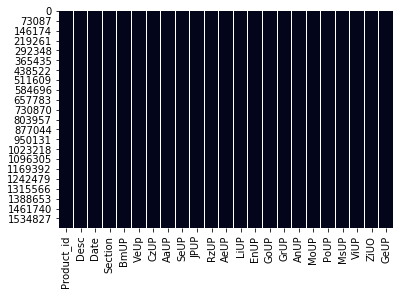

In [88]:
sns.heatmap(df.isnull(), cbar=False)

In [89]:
# Looking at statistics of the data
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_id,1.60789e+06,NaN,NaN,NaN,1883.93,3811.87,0,311,572,1423,400010
Desc,1607603,48516,Empanada Hojaldre y Bonito 6 rac.,12066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1607908,4268,23/12/2009 0:00:00,794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Section,1.60791e+06,NaN,NaN,NaN,0,0,0,0,0,0,0
BmUP,1607108,136,"0,00",952044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VeUp,1607157,177,"0,00",805442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CzUP,1607113,154,"0,00",935969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AaUP,1607024,120,"0,00",881553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeUP,1607161,142,"0,00",847619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JPUP,1607148,142,"0,00",980069,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# Nulls inspection
df.isnull().sum() / df.shape[0] *100

Product_id    0.000933
Desc          0.018969
Date          0.000000
Section       0.000000
BmUP          0.049754
VeUp          0.046707
CzUP          0.049443
AaUP          0.054978
SeUP          0.046458
JPUP          0.047266
RzUP          0.054792
AeUP          0.093165
LiUP          0.087754
EnUP          0.075502
GoUP          0.088873
GrUP          0.087132
AnUP          0.046955
MoUP          0.054854
PoUP          0.045214
MsUP          0.086759
ViUP          0.000000
ZiUO          0.000124
GeUP          0.000000
dtype: float64

In [91]:
len(df["Product_id"].unique())

1941

In [92]:
len(df["Desc"].unique())

48517

In [93]:
#Número de nulls en la columna "Desc"
df.shape[0] - df.dropna(subset = ["Desc"]).shape[0]

305

In [94]:
#Los Null no son significatos, los eliminamos
df = df.dropna(subset = ["Desc"])

In [95]:
df.loc[df["Desc"].str.contains("MOUSSE"), "Desc"].value_counts()

MOUSSE 3 CHOCOLATES 2º                                                                         8805
MOUSSE 3  CHOCOLATES 3º                                                                        6731
MOUSSE 3  CHOCOLATES 1º                                                                        6403
POSTRE MOUSSE TRES CHOCOLATES                                                                  6180
POSTRE MOUSSE DE LIMON                                                                         1723
MOUSSE CHOCOLATE BLANCO                                                                        1680
MOUSSE DE OCA PORCION                                                                          1666
POSTRE MOUSSE CHOCOLATE EN VASITO                                                              1132
MOUSSE DE SALMON                                                                               1077
PETIT-FOUR MOUSSE PRALINE                                                                      1069
